[View in Colaboratory](https://colab.research.google.com/github/UjjwalSaxena/Simple-eye-detection-tests-ML/blob/master/Hello,_Colaboratory.ipynb)

In [4]:
# # !wget https://youtu.be/z008GkZ_cgA?t=46
# # !rm 'index.html'
# # !rm "images"

!pip install moviepy
!pip install Youtube-dl

import cv2
import time
import matplotlib.pyplot as plt
import moviepy
from moviepy.editor import VideoFileClip
import glob
%matplotlib inline
import numpy as np

!mkdir "images_test_25_t0_40"
!youtube-dl "https://youtu.be/z008GkZ_cgA"
!mv "Prescribed Burning the 'Switchback' Unit, in Orleans California.-z008GkZ_cgA.mp4" "images_test_25_t0_40/test_video1.mp4"
# 






# !ls -ltr

    100% |████████████████████████████████| 378kB 8.0MB/s 
    100% |████████████████████████████████| 3.3MB 7.7MB/s 
    100% |████████████████████████████████| 51kB 18.2MB/s 
  Running setup.py bdist_wheel for moviepy ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/ad/92/4d/a6c6307d4c2219d002646bd4a5987e31fd5697f6ea7778b2c0
Successfully built moviepy
    100% |████████████████████████████████| 1.8MB 11.0MB/s 
Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2875392/45929032 bytes (6.3%)6438912/45929032 bytes (14.0%)10002432/45929032 bytes (21.8%)13664256/45929032 bytes (29.8%)17252352/45929032 bytes (37.6%)

In [0]:


def Test_pipeline(img):

  cv2.imwrite("images_test_25_t0_40/image_"+str(time.time())+".jpg",img)
  return img
  

In [4]:


video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('images_test_25_t0_40/test_video1.mp4').subclip(70,100)
processed_video = video_input1.fl_image(Test_pipeline)
%time processed_video.write_videofile(video_output1, audio=False)
video_input1.reader.close()
video_input1.audio.reader.close_proc()

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 750/751 [01:06<00:00, 11.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 14.7 s, sys: 2.36 s, total: 17.1 s
Wall time: 1min 9s


751


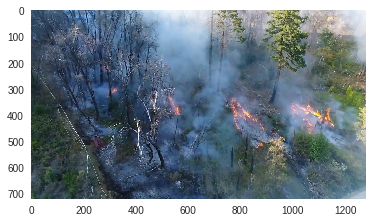

In [8]:
fire_images= glob.glob('images_test_25_t0_40/*.jpg')
print(len(fire_images))

def read_image(img_path= fire_images[340]):
  return cv2.cvtColor(plt.imread(img_path), cv2.COLOR_BGR2RGB)
#   return plt.imread(img_path)

def get_all_images(img):
  images=[]
  for img_path in fire_images:
    images.append(read_image(img_path))
  return images

test_url= fire_images[700]
# test_url="download.jpg"
# print(len(fire_images))
plt.imshow(read_image(test_url))
plt.grid(False)

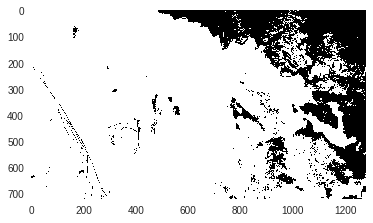

In [9]:
def LAB(img):
  lab= cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
  return lab

def get_regions_above_mean(img_channel):
  mean= np.mean(img_channel)
  img_channel[img_channel<mean]=0 
  img_channel[img_channel>=mean]=1
  
  return img_channel

def get_fire_color_info(a_star,b_star):
  h, w= a_star.shape
  c= np.zeros((h,w))
  for i in range(h):
    for j in range(w):
      if b_star[i,j]>= a_star[i,j]:
        c[i,j]=1
  return c.astype(int) 
   
def get_LAB_star(lab):
  l,a,b= cv2.split(lab)
  l_star= get_regions_above_mean(l)
  a_star= get_regions_above_mean(a)
  b_star= get_regions_above_mean(b)
  return l_star,a_star,b_star


def get_binary_AND(channel_1,channel_2):
  return np.bitwise_and(channel_1,channel_2)


def apply_color_based_approach(img):
  l_star,a_star,b_star= get_LAB_star(LAB(img))
  fire_color= get_fire_color_info(a_star,b_star)
#   bin_mask= get_binary_AND(l_star, a_star)
  bin_mask= get_binary_AND(l_star, b_star)
  bin_mask= get_binary_AND(bin_mask, fire_color)
  return bin_mask

img=read_image(test_url)
bin_mask= apply_color_based_approach(img)
plt.imshow(bin_mask)
plt.grid(False)


In [0]:
# def upload_files():
#   from google.colab import files
#   uploaded = files.upload()
#   for k, v in uploaded.items():
#     open(k, 'wb').write(v)
#   return list(uploaded.keys())

# upload_files()

# !mkdir "full_fire_images"
# # image_folder= "test_fire_images"
# import os
# fire_images1= glob.glob('*.jpg')
# for i in fire_images1:
#   os.rename(i, "full_fire_images/"+i)

# !ls -lrt "full_fire_images"

In [0]:
def change_light(image, coeff):
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS
    image_HLS = np.array(image_HLS, dtype = np.float64) 
    image_HLS[:,:,1] = image_HLS[:,:,1]*coeff ## scale pixel values up or down for channel 1(Lightness)
    if(coeff>1):
        image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 ##Sets all values above 255 to 255
    else:
        image_HLS[:,:,1][image_HLS[:,:,1]<0]=0
    image_HLS = np.array(image_HLS, dtype = np.uint8)
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB
    return image_RGB 


def gen_variants(image): ##function to brighten the image
    
    variants=[]
    for b in range(0, 21, 6):
      brightness_coeff= b/22
      brightness_coeff_t=1+ brightness_coeff ## coeff between 1.0 and 2.0
      image_RGB= change_light(image,brightness_coeff_t)
      variants.append(image_RGB)
    return variants

  
  
# img= plt.imread("full_fire_images/images12.jpg")
# ls= gen_variants(img)
# plt.imshow(ls[4])

In [2]:
l_a_correlation_arr=[]
l_b_correlation_arr=[]
a_b_correlation_arr=[]
correlation_collection=[l_a_correlation_arr,l_b_correlation_arr,a_b_correlation_arr]
image_paths= glob.glob("full_fire_images/*.jpg")
counter=1
for image_path in image_paths:
  
  org_image= plt.imread(image_path)

  aug_images= gen_variants(org_image)
 
  for image1 in aug_images:
    M1= np.zeros((10,10))
    M2= np.zeros((10,10))
    M3= np.zeros((10,10))
    
    image1= LAB(image1)
    h, w= image1.shape[0], image1.shape[1]
    for i in range(h):
      for j in range(w):
        l,a,b= image1[i,j,0]*10//256, image1[i,j,1]*10//256, image1[i,j,2]*10//256
        M1[l,a]+=1
        M2[l,b]+=1
        M3[a,b]+=1
    print(M1)
    break
    Mat_collection=[M1,M2,M3]
    for k in range(3):
      maximum= np.max(Mat_collection[k])
      minimum= np.min(Mat_collection[k])
      rng= maximum-minimum
      Mat_collection[k]= (Mat_collection[k]-minimum)/rng
      correlation_collection[k].append(Mat_collection[k])
    print("processed Image ", counter)
    counter+=1
    
for i in range(3):
  mat_sum=np.zeros((10,10))
  mat_arr= correlation_collection[i]
  print(len(mat_arr), "processing correlation "+ ["l-a","l-b","a-b"][i])
  for arr in mat_arr:
    mat_sum+= arr
  correlation_collection[i]= mat_sum/len(mat_arr)
  
  
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(0, 10)
Y = np.arange(0, 10)
X, Y = np.meshgrid(X, Y)

Z = correlation_collection[0]
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
ax.set_zlim(0, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



NameError: ignored

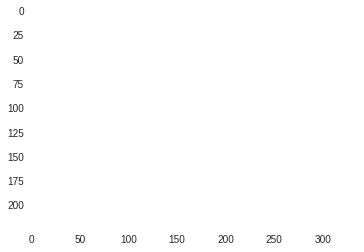

In [74]:
def normalize(channel):
  maximum= np.max(channel)
  minimum= np.min(channel)
  rng= maximum-minimum
  channel= (channel-minimum)/rng
  
def pixel_prob(pixel1,pixel2, index):
  global correlation_collection
  corr= correlation_collection[index]
  P= corr[pixel1*10//256, pixel2*10//256]
  return P
  
def get_Probabilistic_mask(img):
  l,a,b= cv2.split(LAB(img))
  h,w= img.shape[0], img.shape[1]
  P= np.zeros((h,w))
  for i in range(h):
    for j in range(w):
      pixel_l, pixel_a, pixel_b= l[i,j], a[i,j], b[i,j]
      P1=pixel_prob(pixel_l, pixel_a, 0)
      P2=pixel_prob(pixel_l, pixel_b, 1)
      P3=pixel_prob(pixel_a, pixel_b, 2)
      P[i,j]= P1*P2*P3
  return P

# print(mask)
mask= get_Probabilistic_mask(img)
mask_cpy= np.copy(mask).astype(int)
th=0.0001
mask_cpy[mask<th]=0
mask_cpy[mask>=th]=1
plt.imshow(mask_cpy)
plt.grid(False)

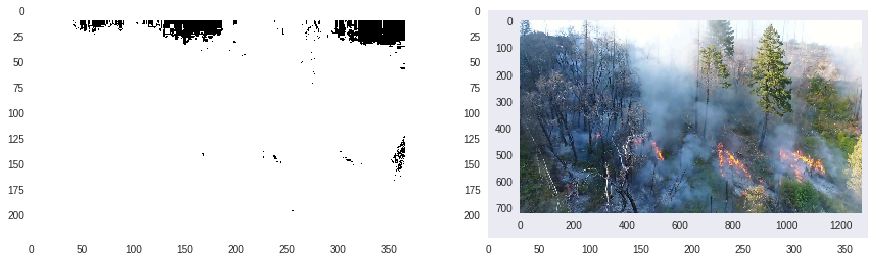

In [185]:
# print(mask_cpy)
bin_mask= get_binary_AND(bin_mask, mask_cpy)
f, axarr = plt.subplots(1,2, figsize=(15,15))
axarr[0].imshow(bin_mask)
axarr[1].imshow(img)
axarr[0].grid(False)
axarr[1].grid(False)

In [148]:
def Interim_pipeLine(img):
  bin_mask= apply_color_based_approach(img)
  mask= get_Probabilistic_mask(img)
  mask_cpy= np.copy(mask).astype(int)
  th=0.001
  mask_cpy[mask<th]=0
  mask_cpy[mask>=th]=1
  
  bin_mask= get_binary_AND(bin_mask, mask_cpy)
  return bin_mask


video_output1 = 'project_video_output_Interim_1.mp4'
video_input1 = VideoFileClip('images_test_25_t0_40/test_video1.mp4').subclip(50,60)
processed_video = video_input1.fl_image(Interim_pipeLine)
%time processed_video.write_videofile(video_output1, audio=False)
video_input1.reader.close()
video_input1.audio.reader.close_proc()

[MoviePy] >>>> Building video project_video_output_Interim_1.mp4
[MoviePy] Writing video project_video_output_Interim_1.mp4


 99%|█████████▉| 150/151 [42:08<00:16, 16.85s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output_Interim_1.mp4 

CPU times: user 42min 7s, sys: 1.47 s, total: 42min 8s
Wall time: 42min 8s


In [192]:
from google.colab import files
# files.download('images_test_25_t0_40/test_video1.mp4')
# file= open("workfile.txt","w")
# file.write(correlation_collection) 

# import numpy as np
with file('workfile.txt', 'w') as outfile:
    for slice_2d in correlation_collection:
        np.savetxt(outfile, slice_2d)

files.download('workfile.txt')

TypeError: ignored

In [0]:
# from mpl_toolkits.mplot3d import Axes3D
# !mkdir "FireImagesFromInternet"
# !mkdir "FireImagesFromInternet_mask"
# image_folder= "FireImagesFromInternet"
# mask_folder= "FireImagesFromInternet_mask"

# !mkdir "full_fire_images"
# image_folder= "full_fire_images"
# def upload_files():
#   from google.colab import files
#   uploaded = files.upload()
#   for k, v in uploaded.items():
#     open(k, 'wb').write(v)
#   return list(uploaded.keys())

# upload_files()

# import os
# fire_images1= glob.glob('*.jpg')
# for i in fire_images1:
#   os.rename(i, "full_fire_images/"+i)
# !ls -lrt

# dict_images_and_masks={}
image_paths= glob.glob(image_folder+"/*.jpg")
# def get_images_and_masks():
#   for image_path in image_paths:
#     image_name= image_path.split('/')[1].split('.')[0]
#     mask_name= image_name+'_mask.jpg'
#     mask_path= mask_folder+"/"+mask_name
#     dict_images_and_masks[image_path]= mask_path
#   return dict_images_and_masks  
    
# dict_images_and_masks= get_images_and_masks()

# for key in dict_images_and_masks.keys():
#   image= cv2.cvtColor(plt.imread(key), cv2.COLOR_RGB2LAB) 
#   mask= cv2.cvtColor(plt.imread(dict_images_and_masks[key]),cv2.COLOR_RGB2GRAY) 
#   mask[mask<=50]=0
#   mask[mask>50]=1
  
#   img_cpy= np.copy(image)
#   img_cpy[mask==0]=0
#   plt.imshow(img_cpy)
#   plt.grid(False)
#   break
#   print(dict_images_and_masks[key])


# for image_path in image_paths:
#   image= cv2.cvtColor(plt.imread(image_path), cv2.COLOR_RGB2LAB) 
#   resized_image = cv2.resize(image, (100, 100)) 
#   l_star, a_star, b_star = get_LAB_star(resized_image)
#   P1= l_star-a_star
#   P1
#   P2= l_star-b_star
#   P3= a_star-b_star
  
#   plt.imshow(img_cpy)
#   plt.grid(False)
  